In [ ]:
#Analyze clusters only based on intensity

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from skimage.measure import regionprops_table
from os.path import isfile, join
import pandas as pd

In [ ]:
#From ClusterFile

In [45]:
clusterpath = '/Users/jones/Library/CloudStorage/GoogleDrive-jonasbraunnu@gmail.com/.shortcut-targets-by-id/1D_bPjhT95POOAirSmkzFskKPd4RlOOwP/luisaLab/plotData/rainbowClusters/9dayAortas_ClusterSize.csv'

In [46]:
df = pd.read_csv(clusterpath)

In [51]:
df[df.name == 'aorta6'].sum()

name           aorta6aorta6aorta6aorta6aorta6aorta6aorta6aort...
clusterSize                                                 2958
dtype: object

In [1]:
### from nuclei segmentation

In [72]:
orangePathTotal = '/Users/jbj7388/Library/CloudStorage/GoogleDrive-jonasbraunnu@gmail.com/.shortcut-targets-by-id/1D_bPjhT95POOAirSmkzFskKPd4RlOOwP/LuisaLab/data/preprocessedData/rainbow/P30/220513_P30_rainbow_aorta2_orange.tif'

bluePathTotal = '/Users/jbj7388/Library/CloudStorage/GoogleDrive-jonasbraunnu@gmail.com/.shortcut-targets-by-id/1D_bPjhT95POOAirSmkzFskKPd4RlOOwP/LuisaLab/data/preprocessedData/rainbow/P30/220513_P30_rainbow_aorta2_blue.tif'

nucleiFolder = "/Users/jbj7388/Library/CloudStorage/GoogleDrive-jonasbraunnu@gmail.com/.shortcut-targets-by-id/1D_bPjhT95POOAirSmkzFskKPd4RlOOwP/LuisaLab/data/segmentations/rainbow/P30/nuclei/aorta2"

In [ ]:
def meanIntensityBlue(row):
    nucleus = row['label']
    return np.mean(blueImage[np.where(nucleiMasks == nucleus)])

def medianIntensityBlue(row):
    nucleus = row['label']
    return np.median(blueImage[np.where(nucleiMasks == nucleus)])

def meanIntensityOrange(row):
    nucleus = row['label']
    return np.mean(orangeImage[np.where(nucleiMasks == nucleus)])

def medianIntensityOrange(row):
    nucleus = row['label']
    return np.median(orangeImage[np.where(nucleiMasks == nucleus)])

def blueLabel(row):
    threshold = row['blueThreshold']
    value = row['medianIntensityBlue']
    if value >= threshold:
        label = 1
    else:
        label = 0
    return label

def orangeLabel(row):
    threshold = row['orangeThreshold']
    value = row['medianIntensityOrange']
    if value >= threshold:
        label = 1
    else:
        label = 0
    return label

In [73]:
orangeImage = skimage.io.imread(orangePathTotal)
blueImage = skimage.io.imread(bluePathTotal)

([array([1319.,   67.,   19.,   13.,    7.,    3.,    0.,    3.,    0.,
            0.]),
  array([1319.,   66.,   20.,   12.,    5.,    4.,    3.,    2.,    0.,
            0.]),
  array([1325.,   58.,   20.,    9.,    7.,    6.,    2.,    4.,    0.,
            0.]),
  array([1325.,   62.,   19.,    9.,    7.,    3.,    4.,    2.,    0.,
            0.]),
  array([1323.,   62.,   21.,   10.,    7.,    4.,    2.,    0.,    2.,
            0.]),
  array([1.33e+03, 5.60e+01, 2.20e+01, 9.00e+00, 4.00e+00, 5.00e+00,
         1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00]),
  array([1324.,   70.,   20.,    4.,    6.,    5.,    2.,    0.,    0.,
            0.]),
  array([1.326e+03, 7.700e+01, 1.600e+01, 2.000e+00, 7.000e+00, 1.000e+00,
         2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
  array([1328.,   73.,   16.,    7.,    3.,    2.,    2.,    0.,    0.,
            0.]),
  array([1.326e+03, 7.100e+01, 2.500e+01, 7.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.0

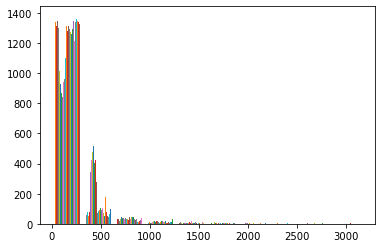

In [74]:
plt.hist(orangeImage)

([array([257., 609., 457.,  48.,  26.,  13.,   8.,   6.,   4.,   3.]),
  array([257., 585., 482.,  50.,  27.,  12.,   4.,   4.,   3.,   7.]),
  array([257., 581., 487.,  54.,  26.,   9.,   2.,   2.,   3.,  10.]),
  array([257., 567., 512.,  53.,  20.,   3.,   5.,   0.,   4.,  10.]),
  array([257., 574., 496.,  66.,  12.,   8.,   2.,   3.,   4.,   9.]),
  array([257., 598., 483.,  56.,  12.,   8.,   1.,   3.,   4.,   9.]),
  array([259., 637., 452.,  47.,  12.,   8.,   1.,   4.,   3.,   8.]),
  array([259., 647., 437.,  51.,  11.,  11.,   4.,   3.,   0.,   8.]),
  array([259., 644., 422.,  65.,  15.,  14.,   3.,   1.,   4.,   4.]),
  array([259., 633., 417.,  72.,  24.,  13.,   5.,   1.,   5.,   2.]),
  array([259., 613., 441.,  64.,  32.,   9.,   5.,   4.,   1.,   3.]),
  array([258., 613., 422.,  83.,  31.,   9.,   7.,   5.,   0.,   3.]),
  array([258., 607., 440.,  62.,  41.,   9.,   2.,   6.,   3.,   3.]),
  array([258., 617., 426.,  65.,  41.,  10.,   3.,   3.,   4.,   4.]),
  arra

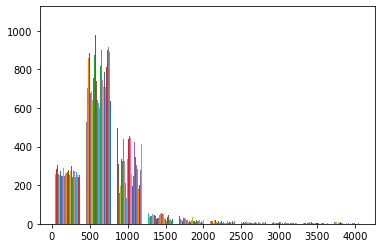

In [75]:
plt.hist(blueImage)

In [85]:
properties = ('label', 'centroid')
blueThreshold = 803
orangeThreshold = 340

In [86]:
df = pd.DataFrame()
for i in range(16):
    nuclei = np.load(join(nucleiFolder, "Cropped_IMG-" + str((i+1)) + "_seg.npy"), allow_pickle=True).item()
    nucleiMasks = nuclei["masks"]
    props = skimage.measure.regionprops_table(nucleiMasks)
    df_help = pd.DataFrame(props)
    if df_help.shape[0] > 0:
        df_help['meanIntensityBlue'] = df_help.apply(lambda row: meanIntensityBlue(row), axis=1)
        df_help['medianIntensityBlue'] = df_help.apply(lambda row: medianIntensityBlue(row), axis=1)
        df_help['meanIntensityOrange'] = df_help.apply(lambda row: meanIntensityOrange(row), axis=1)
        df_help['medianIntensityOrange'] = df_help.apply(lambda row: medianIntensityOrange(row), axis=1)


    df_help['pictureID'] = (i+1)
    df_help['blueThreshold'] = blueThreshold
    df_help["orangeThreshold"] = orangeThreshold

    df_help["blue"] = df_help.apply(lambda row: blueLabel(row), axis=1)
    df_help["orange"] = df_help.apply(lambda row: orangeLabel(row), axis=1)
    df = pd.concat((df, df_help), axis=0, ignore_index=True)
